# <center> Stellar parameters analysis </center>

<font color='gray'> Author: Pedro Mas Buitrago, Centro de Astrobiología (CAB) </font>

<font color='gray'> Last updated -- 28/february/2024 </font>

<font color='gray'>pmas@cab.inta-csic.es</font>

<font color='gray'>https://pedromasb.github.io/</font>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('final_estimations.csv').sort_values(by='karmn')
mdwarfs = pd.read_csv('mdwarfs_data.csv').sort_values(by='karmn')

teff_carm_pred = data['Teff']
mh_carm = data['[M/H]']
logg_carm = data['logg']
vsini_carm = data['vsini']
lbol = mdwarfs['Lbol_new']

flag_young_kin = mdwarfs['Pop'] == 'YD'
flag_td = mdwarfs['Pop'] == 'TD'
flag_stellar_assoc = (mdwarfs['banyanYA'].notnull() | mdwarfs['karmn'].isin(['J09133+688','J12156+526','J15218+209','J18174+483']))
flag_active = mdwarfs['Factive'] == 1
flag_lowm = mdwarfs['karmn'].isin(['J12248-182','J16254+543','J19070+208','J19072+208'])

## HR Diagram (Figure 8)

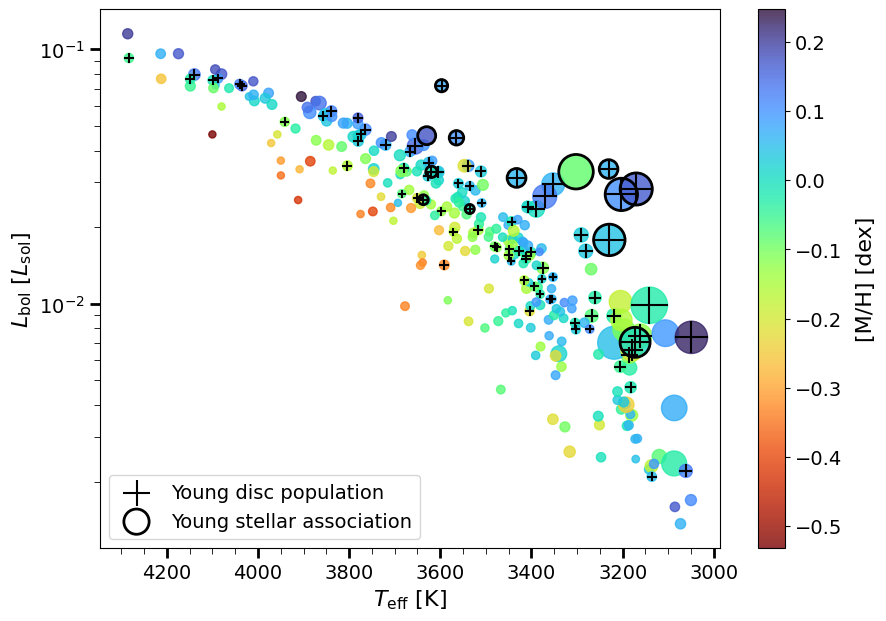

In [17]:
fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlabel('$T_{\mathrm{eff}}$ [K]',fontsize=16)
ax.set_ylabel('$L_{\mathrm{bol}}$ [$L_{\mathrm{sol}}$]',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14,width=2,length=7)
ax.tick_params(axis='both', which='minor', labelsize=12, length=4)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_yscale('log')
ax.invert_xaxis()

f = ax.scatter(teff_carm,lbol,c=mh_carm,cmap='turbo_r',alpha=0.8,s=vsini_carm*18)
ax.scatter(teff_carm[flag_young_kin],lbol[flag_young_kin],color='none',s=vsini_carm[flag_young_kin]*18,marker='+',ec='black',label='Young disc population ',lw=1.5)
ax.scatter(teff_carm[flag_stellar_assoc],lbol[flag_stellar_assoc],color='none',s=vsini_carm[flag_stellar_assoc]*18,ec='black',lw=2,label='Young stellar association')

cbar = plt.colorbar(f)
cbar.ax.set_ylabel('[M/H] [dex]',fontsize=16,labelpad=10)
cbar.ax.tick_params(labelsize=14)

plt.legend(fontsize=14,loc='lower left')

plt.show()

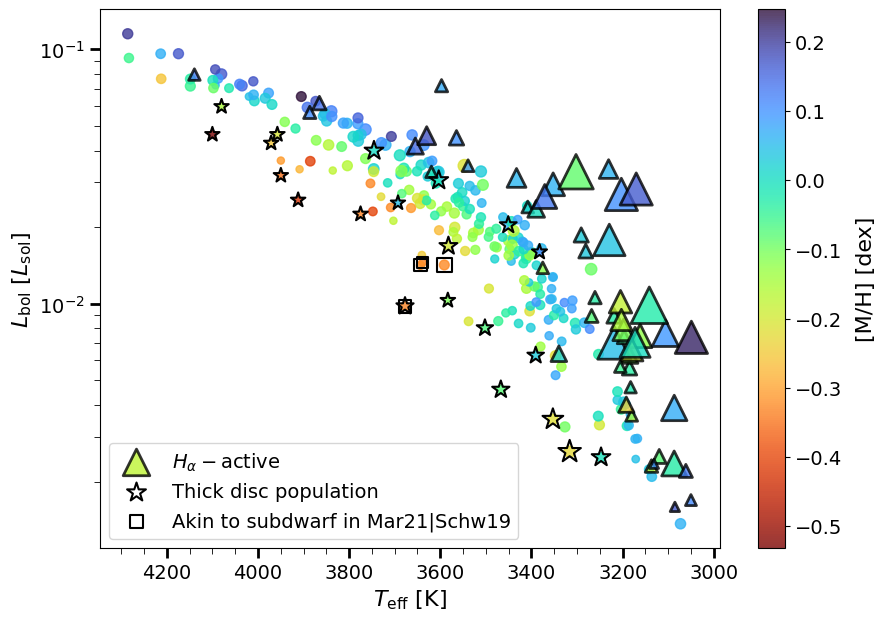

In [23]:
fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlabel('$T_{\mathrm{eff}}$ [K]',fontsize=16)
ax.set_ylabel('$L_{\mathrm{bol}}$ [$L_{\mathrm{sol}}$]',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14,width=2,length=7)
ax.tick_params(axis='both', which='minor', labelsize=12, length=4)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_yscale('log')
ax.invert_xaxis()

f = ax.scatter(teff_carm[~flag_active],lbol[~flag_active],c=mh_carm[~flag_active],cmap='turbo_r',alpha=0.8,s=vsini_carm[~flag_active]*18)
f = ax.scatter(teff_carm[flag_active],lbol[flag_active],c=mh_carm[flag_active],cmap='turbo_r',vmin=mh_carm.min(),vmax=mh_carm.max(),ec='black',alpha=0.8,marker='^',lw=2,s=vsini_carm[flag_active]*18,label=r"$H_{\alpha}-$active")
ax.scatter(teff_carm[flag_td],lbol[flag_td],color='none',s=vsini_carm[flag_td]*80,ec='black',lw=1.5,marker='*',label='Thick disc population')
ax.scatter(teff_carm[flag_lowm],lbol[flag_lowm],color='none',s=vsini_carm[flag_lowm]*40,ec='black',lw=1.5,marker='s',label='Akin to subdwarf in Mar21|Schw19')

cbar = plt.colorbar(f)
cbar.ax.set_ylabel('[M/H] [dex]',fontsize=16,labelpad=10)
cbar.ax.tick_params(labelsize=14)

plt.legend(fontsize=14,loc='lower left')

plt.show()

## Kinematic population analysis (Figure 9)

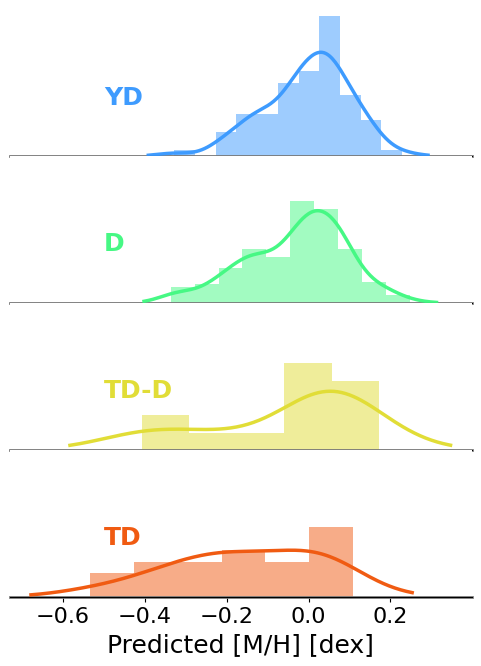

In [28]:
df_kin = pd.concat([mdwarfs[['karmn','Pop']],mh_carm],axis=1)

pal = sns.color_palette(palette='turbo', n_colors=4)

g = sns.FacetGrid(df_kin, row='Pop',aspect=3, height=1.7)

g.map(plt.axhline, y=0,lw=2,color='grey',clip_on=False)
g.map(sns.histplot,'[M/H]',stat='density',common_norm=True,hue=df_kin['Pop'],palette=pal,
      clip_on=False,fill=True, alpha=0.5, linewidth=0)

g.map(sns.kdeplot,'[M/H]',hue=df_kin['Pop'],palette=pal,
      clip_on=False,fill=False, cut=1.5, linewidth=2.5)

for i, ax in enumerate(g.axes.flat):
    ax.text(-0.5, 2, df_kin['Pop'].unique()[i],
            fontweight='bold', fontsize=18,
            color=ax.lines[-1].get_color())
    
g.fig.subplots_adjust(hspace=0)

g.set_titles("")
g.set_ylabels("")
g.set(yticks=[])
g.despine(bottom=False, left=True)

plt.setp(ax.get_xticklabels(), fontsize=16)
plt.xlabel('Predicted [M/H] [dex]', fontsize=18)

plt.show()